# Exercícios

### 1. Crie uma nova coluna chamada: “dormitory_type” - Se o valor da coluna “bedrooms” for igual à 1 => ‘studio’ - Se o valor da coluna “bedrooms” for igual a 2 => ‘apartament’ - Se o valor da coluna “bedrooms” for maior que 2 => ‘house’

In [21]:
pip install matplotlib

     |████████████████████████████████| 10.3 MB 231 kB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 1.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [87]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
import plotly.express as px

In [65]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
matplotlib.rcParams['figure.figsize'] = (15, 8)

In [2]:
data = pd.read_csv('data/kc_house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
data.dtypes

id                  int64
date               object
price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront          int64
view                int64
condition           int64
grade               int64
sqft_above          int64
sqft_basement       int64
yr_built            int64
yr_renovated        int64
zipcode             int64
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
dormitory_type     object
dtype: object

In [38]:
data['yr_renovated']

0           0
1        1991
2           0
3           0
4           0
         ... 
21608       0
21609       0
21610       0
21611       0
21612       0
Name: yr_renovated, Length: 21613, dtype: int64

In [12]:
data['dormitory_type'] = 'studio'
data.loc[data['bedrooms'] == 2, 'dormitory_type'] = 'apartment'
data.loc[data['bedrooms'] > 2, 'dormitory_type'] = 'house'
data[['bedrooms', 'dormitory_type']]

,bedrooms,dormitory_type
0,3,house
1,3,house
2,2,apartment
3,4,house
4,3,house
...,...,...
21608,3,house
21609,4,house
21610,2,apartment
21611,3,house


### 2. Faça um gráfico de barras que represente a média dos preços pelo número de quartos.

<AxesSubplot:xlabel='bedrooms'>

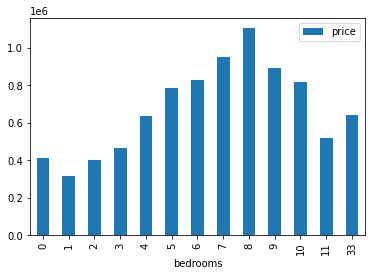

In [29]:
data[['bedrooms', 'price']].groupby('bedrooms').mean().plot(kind='bar')

### 3. Faça um gráfico de linhas que represente a média dos preços pelo ano construção dos imóveis.

<AxesSubplot:xlabel='yr_built'>

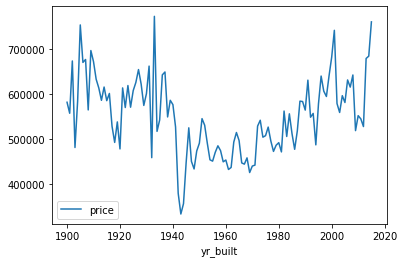

In [31]:
data[['yr_built', 'price']].groupby('yr_built').mean().plot()

### 4. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.

<AxesSubplot:xlabel='dormitory_type'>

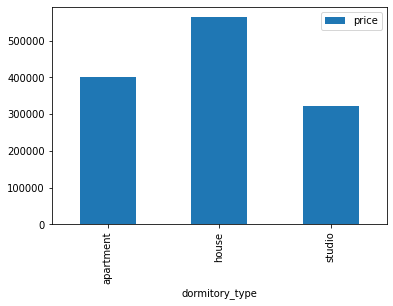

In [32]:
data[['dormitory_type', 'price']].groupby('dormitory_type').mean().plot(kind='bar')

### 5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1930.

<AxesSubplot:xlabel='yr_renovated'>

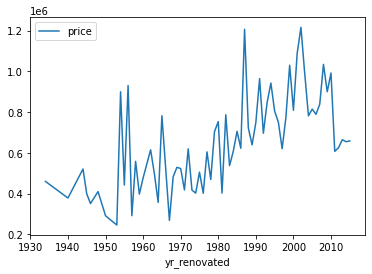

In [44]:
data.loc[data['yr_renovated'] >= 1930, ['yr_renovated', 'price']].groupby('yr_renovated').mean().plot()

### 6. Faça um tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis.

In [46]:
data[['yr_built', 'dormitory_type', 'price']].groupby(['yr_built', 'dormitory_type']).mean()

price
yr_built dormitory_type          
1900     apartment      589533.33
         house          584854.27
         studio         398944.00
1901     apartment      452856.40
         house          578619.17
...                           ...
2014     house          692687.72
         studio         516500.00
2015     apartment      543250.00
         house          797383.06
         studio         385195.00

[309 rows x 1 columns]

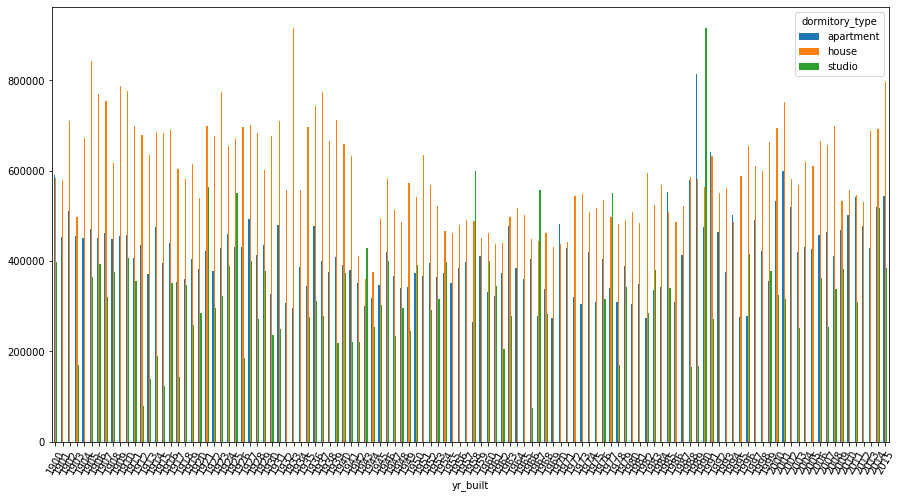

In [70]:
pd.crosstab(data['yr_built'], data['dormitory_type'], values=data['price'], aggfunc='mean').plot(kind='bar')
plt.xticks(rotation=60);

### 7. Crie um Dashboard com os gráficos das questões 02, 03, 04 ( Dashboard: 1 Linha e 2 colunas )

<BarContainer object of 3 artists>

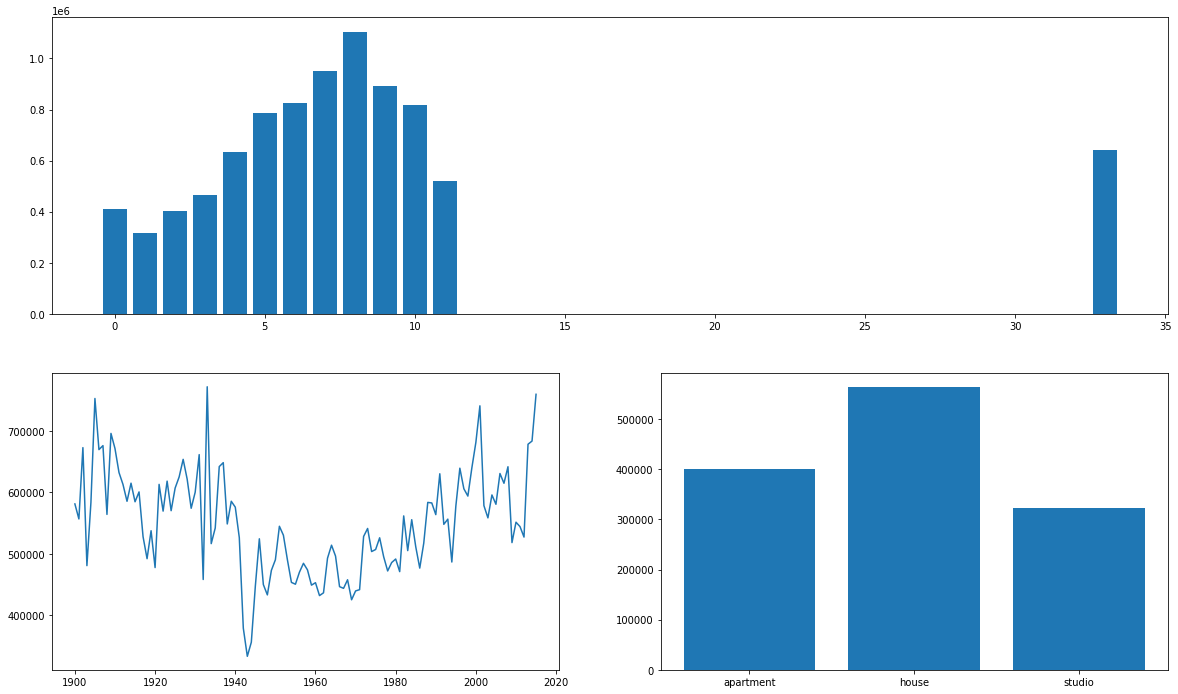

In [83]:
fig = plt.figure(figsize=(20, 12))
specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

ax1 = fig.add_subplot(specs[0, :]) # First row
ax2 = fig.add_subplot(specs[1, 0]) # Second row
ax3 = fig.add_subplot(specs[1, 1]) # Second row

# First graph
_ = data[['bedrooms', 'price']].groupby('bedrooms').mean().reset_index()
ax1.bar(_['bedrooms'], _['price'])

# Second graph
_ = data[['yr_built', 'price']].groupby('yr_built').mean().reset_index()
ax2.plot(_['yr_built'], _['price'])
# Third graph
_ = data[['dormitory_type', 'price']].groupby('dormitory_type').mean().reset_index()
ax3.bar(_['dormitory_type'], _['price'])

### 8. Crie um Dashboard com os gráficos das perguntas 02, 04 ( Dashboard: 2 colunas )

<BarContainer object of 3 artists>

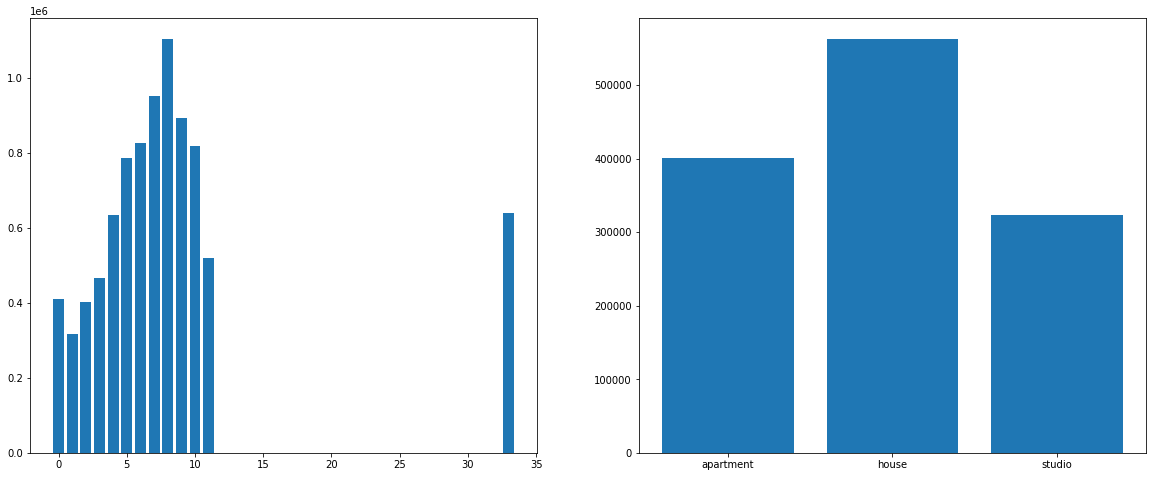

In [84]:
fig = plt.figure(figsize=(20, 8))
specs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

ax1 = fig.add_subplot(specs[0, 0]) # First column
ax2 = fig.add_subplot(specs[0, 1]) # Second column

_ = data[['bedrooms', 'price']].groupby('bedrooms').mean().reset_index()
ax1.bar(_['bedrooms'], _['price'])

_ = data[['dormitory_type', 'price']].groupby('dormitory_type').mean().reset_index()
ax2.bar(_['dormitory_type'], _['price'])

### 9. Crie um Dashboard com os gráficos das perguntas 03, 05 ( Dashboard: 2 Linhas )

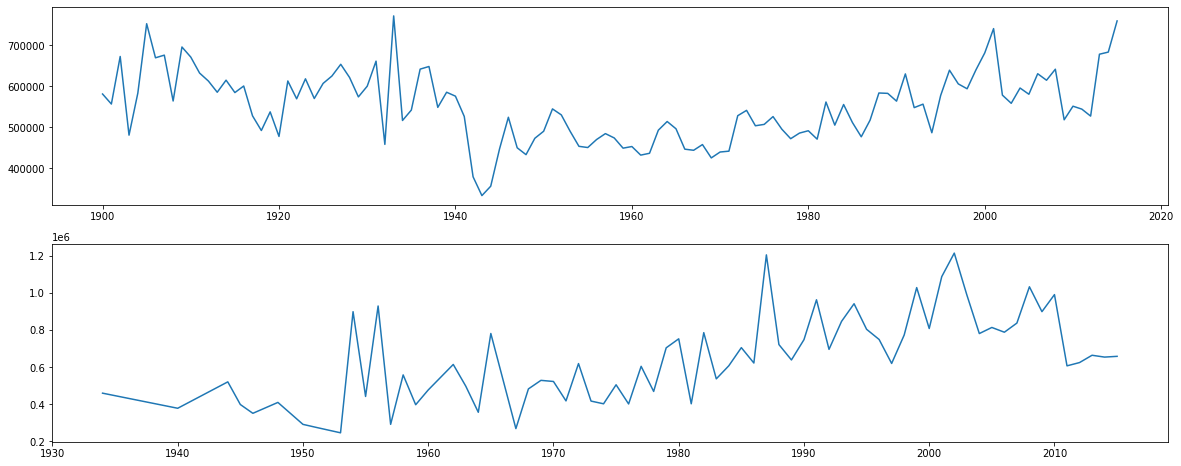

In [85]:
fig = plt.figure(figsize=(20, 8))
specs = gridspec.GridSpec(ncols=1, nrows=2, figure=fig)

ax1 = fig.add_subplot(specs[0, :]) # First column
ax2 = fig.add_subplot(specs[1, :]) # Second column

_ = data[['yr_built', 'price']].groupby('yr_built').mean().reset_index()
ax1.plot(_['yr_built'], _['price'])

_ = data.loc[data['yr_renovated'] >= 1930, ['yr_renovated', 'price']].groupby('yr_renovated').mean().reset_index()
ax2.plot(_['yr_renovated'], _['price'])

### 10. Faça um gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar 

In [86]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'dormitory_type'],
      dtype='object')

In [96]:
fig = px.scatter_mapbox(data, 'lat', 'long', size='sqft_living', hover_name='id', hover_data=['price'], 
                  color_discrete_sequence=['darkgreen'], zoom=7, height=600)
fig.update_layout(mapbox_style='open-street-map', margin={'r': 0, 't': 0, 'l': 0, 'b': 0})
fig.show()